# Label extraction

### Testing BART c

In [9]:
from transformers import pipeline
# Define the zero-shot classification pipeline
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [10]:
import pandas as pd
df = pd.read_csv('./data/raw/Education_videos_7_cleaned.csv')

In [11]:
df['upload_date'] = pd.to_datetime(df['upload_date'])
df['year'] = df['upload_date'].dt.year

In [12]:
df_2018 = df[df['year'] == 2018]
len(df_2018)

95465

In [13]:
N = 10000
df_2018_sampled = df_2018.sample(N, replace=False)

In [7]:
import importlib
import classify
importlib.reload(classify)
from classify import classify
import torch
from transformers import pipeline

purpose_labels = [
    "academic",
    "edutainment or science popularization",
    "hobby"
]

# Set the device to cuda
device = torch.device('cuda')

data = df_2018_sampled.copy()

# Initialize the BART-based classifier
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli", device=device)

# Pre-process text
data['text'] = data['title'] + data['tags']

# Perform classification
print('Start classification...')
final_data = classify(data, candidate_labels=purpose_labels, on='text', classifier=classifier, batch_size=32, multi_label=False)

# Save results
final_data.to_csv('data/raw/Education_videos_7_classified_BART_2018_3_labels.csv', index=False)
print('CSV saved')

Start classification...
Converting to dataset...
Processing...


Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


Converting back to DataFrame...
CSV saved


[18.97466573] [0.06154979]


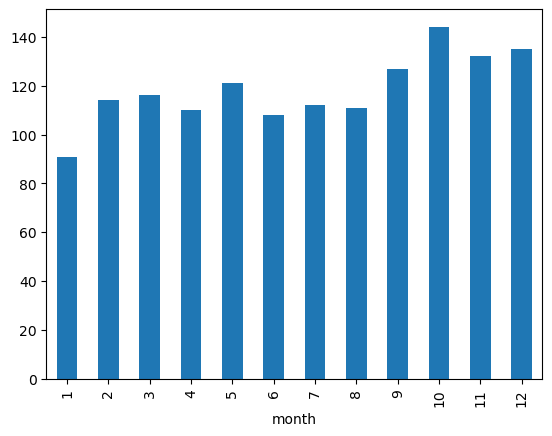

In [8]:
import ast
import pandas as pd
import numpy as np
from sklearn.feature_selection import chi2
classified = pd.read_csv(r'data\raw\Education_videos_7_classified_BART_2018_3_labels.csv')
classified['classified_labels'] = classified['classified_labels'].apply(lambda x: ast.literal_eval(x))
classified['label'] = classified['classified_labels'].apply(lambda x: x[0])
classified['upload_date'] = pd.to_datetime(classified['upload_date'])
classified['month'] = classified['upload_date'].dt.month
academic = classified[classified['label'] == 'academic']
academic.groupby('month').size().plot(kind='bar')
number_per_month = np.asarray(academic.groupby('month').size()).reshape(-1,1)
months = np.arange(12) + 1
chi_stat, p_value = chi2(number_per_month, months)
print(chi_stat, p_value)



In [22]:
import pandas as pd

path = './data/raw'
df = pd.DataFrame()

for i in range(8):
    new_df = pd.read_csv(path+f'/Education_videos_{i}_cleaned.csv')
    new_df = new_df.dropna(axis=0)
    df = pd.concat([df, new_df])
    del(new_df)
    print(f'Imported Education_videos_{i}_cleaned.csv')

Imported Education_videos_0_cleaned.csv
Imported Education_videos_1_cleaned.csv
Imported Education_videos_2_cleaned.csv
Imported Education_videos_3_cleaned.csv
Imported Education_videos_4_cleaned.csv
Imported Education_videos_5_cleaned.csv
Imported Education_videos_6_cleaned.csv
Imported Education_videos_7_cleaned.csv


In [23]:
df['upload_date'] = pd.to_datetime(df['upload_date'])
df['year'] = df['upload_date'].dt.year

In [3]:
import importlib
import classify
importlib.reload(classify)
from classify import classify
import torch
from transformers import pipeline


year = 2018
df_year = df[df['year'] == year]

N = 50000
data = df_year.sample(N)

purpose_labels = [
    "academic",
    "edutainment or science popularization",
    "hobby"
]

# Set the device to cuda
device = torch.device('cuda')

# Initialize the BART-based classifier
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli", device=device)

# Pre-process text
data['text'] = data['title'] + data['tags']


# Perform classification
print('Start classification...')
final_data = classify(data, candidate_labels=purpose_labels, on='text', classifier=classifier, batch_size=16, multi_label=False)

# Save results
final_data.to_csv(f'data/raw/Education_videos_classified_BART_{year}_{N}_3_labels.csv', index=False)
print('CSV saved')

Start classification...
Converting to dataset...
Processing...


Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


Converting back to DataFrame...
CSV saved


[206.21371247] [3.8140123e-38]


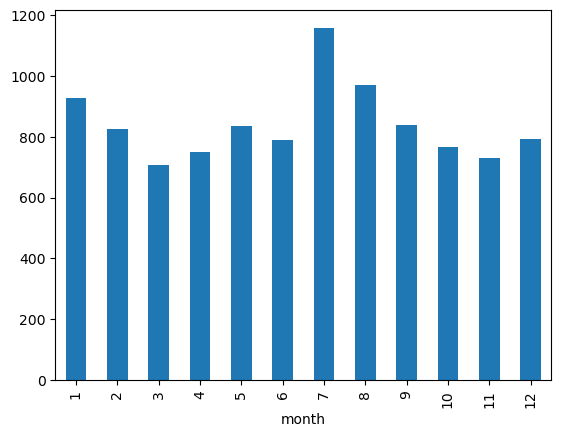

In [9]:
import ast
import pandas as pd
import numpy as np
from sklearn.feature_selection import chi2
classified = pd.read_csv(r'data\raw\Education_videos_classified_BART_2018_50000_3_labels.csv')
classified['classified_labels'] = classified['classified_labels'].apply(lambda x: ast.literal_eval(x))
classified['label'] = classified['classified_labels'].apply(lambda x: x[0])
classified['upload_date'] = pd.to_datetime(classified['upload_date'])
classified['month'] = classified['upload_date'].dt.month
academic = classified[classified['label'] == 'academic']
academic.groupby('month').size().plot(kind='bar')
number_per_month = np.asarray(academic.groupby('month').size()).reshape(-1,1)
months = np.arange(12) + 1
chi_stat, p_value = chi2(number_per_month, months)
print(chi_stat, p_value)



In [7]:
classified.groupby('label').size()

label
academic                                 10093
edutainment or science popularization    25844
hobby                                     9370
uncertain                                 4693
dtype: int64

In [24]:
import importlib
import classify
importlib.reload(classify)
from classify import classify
import torch
from transformers import pipeline



N = 50000
data = df.sample(N)

purpose_labels = [
    "academic",
    "edutainment or science popularization",
    "hobby"
]

# Set the device to cuda
device = torch.device('cuda')

# Initialize the BART-based classifier
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli", device=device)

# Pre-process text
data['text'] = data['title'] + data['tags']


# Perform classification
print('Start classification...')
final_data = classify(data, candidate_labels=purpose_labels, on='text', classifier=classifier, batch_size=16, multi_label=False)

# Save results
final_data.to_csv(f'data/raw/Education_videos_classified_BART_{N}_3_labels.csv', index=False)
print('CSV saved')

Start classification...
Converting to dataset...
Processing...


Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


Converting back to DataFrame...
CSV saved
